In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['amazon_jobs_dataset.csv']


In [2]:
path='../input/amazon_jobs_dataset.csv'

Number of job openings in **Bangalore**,India and in **Seattle**,USA

In [3]:
count1=0
count2=0
import csv
with open(path) as file_obj:
    file=csv.DictReader(file_obj,delimiter=',',skipinitialspace=True)
    file_list=list(file)
for row in file_list:
    value=row['location']
    banglore='IN, KA, Bangalore '
    seattle ='US, WA, Seattle '
    if value==banglore:
        count1+=1
    if value==seattle:
        count2+=1
print(banglore,':',count1)
print(seattle,':',count2)

IN, KA, Bangalore  : 66
US, WA, Seattle  : 1856


 Total number of **job** openings related to **Computer Vision **

In [4]:
count=0
for row in file_list:
    value=row['Title']
    comvision='Computer Vision'
    if comvision in value or 'computer vision' in value:
        count+=1
print(count)

14


Number of job openings in** Canada**

In [5]:
Country_Code='CA' 
job_opening=0
for row in file_list:
    if row['location'].split(',')[0]==Country_Code:
        job_opening=job_opening+1
print(job_opening)

156


**Month** having** most job** openings in Year **2018**

In [6]:
import csv
posting_date=[]
for row in file_list:
    posting_date.append(row['Posting_date'])
def getTheJobYearList(arr,year):
    year_list=[]
    for i in arr:
        if i.split(' ')[-1]==year:
            year_list.append(i) 
    return year_list
year2018=getTheJobYearList(posting_date,'2018') 
def getTheMonthList(arr):
    month=[] 
    for i in arr:
        month.append(i.split(' ')[0]) 
    return month 
def createDictionary(arr): 
    dictionary={i:0 for i in set(arr)}
    for i in arr:
        dictionary[i]=dictionary.get(i)+1
    return dictionary
dictionary=createDictionary(getTheMonthList(year2018))
 
def convertDictToList(dictionary):
    month_job=[]
    for i in dictionary:
        month_job.append([dictionary.get(i),i])
        month_job.sort(reverse=True) 
    return month_job 
month2018=convertDictToList(dictionary)
print(month2018[0][1],month2018[0][0])

January 907


 Number of job openings are present if applicant have **Bachelor degree**

In [7]:
count=0
for row in file_list:
    value=row['BASIC QUALIFICATIONS']
    if 'Bachelor' in value or 'BS' in value or 'BA' in value:
        count+=1
print(count)

2961


Among J**ava, C++ and Pytho**n, which of the language has more job openings in India for **Bachelor Degree Holder**?

In [8]:
python=0
java=0
c=0
for row in file_list:
    value=row['location']
    degree=row['BASIC QUALIFICATIONS']
    if value.split(',')[0]=='IN':
        if 'BS' in degree or 'Bachelor' in degree or 'BA' in degree:
            if 'Python' in degree:
                python+=1
            if 'Java' in degree:
                java+=1
            if 'C++' in degree:
                c+=1
if python>java and python>c:
    print('Python',python)
elif java>python and java >c:
    print('Java',java)
elif c>python and c>java:
    print('C++',c)        

Java 103


which country does** Amazon** need the most number of **Java Developer**?

In [9]:
country_basic_qualifications=[] 
for row in file_list:
    country_basic_qualifications.append([row['location'],row['BASIC QUALIFICATIONS']])
## Get Java Developer from the different country 
def getTheJavaDeveloper(arr): 
    arrlist=[] 
    for i in arr:
        if 'Java' in i[1]:
            arrlist.append(i[0].split(',')[0])
    return arrlist
java_developer=getTheJavaDeveloper(country_basic_qualifications)
def createDictionary(arr): 
    dictionary={i:0 for i in set(arr)} 
    for i in arr: 
        dictionary[i]=dictionary.get(i)+1
    return dictionary
def convertDictToList(dictionary): 
    arrlist=[] 
    for i in dictionary:
        arrlist.append([dictionary.get(i),i])
        arrlist.sort(reverse=True)
    return arrlist 
java_dict=createDictionary(java_developer)
java_list=convertDictToList(java_dict) 
print(java_list[0][1],java_list[0][0])

US 2009


Number of Job postings with respect to year

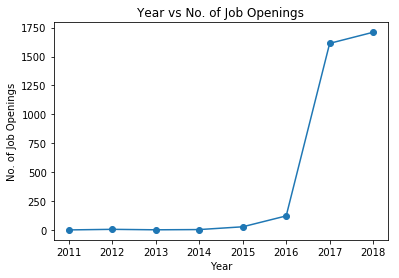

2011 2
2012 7
2013 3
2014 5
2015 29
2016 123
2017 1614
2018 1710


In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
file_obj = open('../input/amazon_jobs_dataset.csv',encoding='utf-8')
data = pd.read_csv(file_obj)
date = data['Posting_date']
year = date.str.split(', ', expand = True)[1]
#print(type(year))
freq = year.value_counts(ascending = True)
freq.sort_index(inplace=True)
x = freq.index
y = freq
plt.plot(x, y, marker = 'o')
plt.title('Year vs No. of Job Openings')
plt.xlabel('Year')
plt.ylabel('No. of Job Openings')
plt.show()

for i in range(len(x)):
    print(x[i],y[i])

**Month vs Job Opening**s

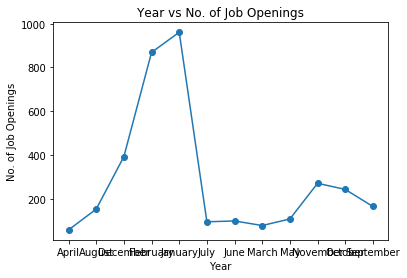

April 58
August 153
December 393
February 869
January 961
July 95
June 99
March 78
May 108
November 271
October 243
September 165


In [11]:
date=data['Posting_date']
month=date.str.split(' ',expand=True)[0]
freq = month.value_counts(ascending = True)
freq.sort_index(inplace=True)
x = freq.index
y = freq
plt.plot(x, y, marker = 'o')
plt.title('Year vs No. of Job Openings')
plt.xlabel('Year')
plt.ylabel('No. of Job Openings')
plt.show()
for i in range(len(x)):
    print(x[i],y[i])

**Indian cities vs No. of jobs opening**

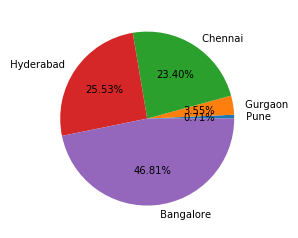

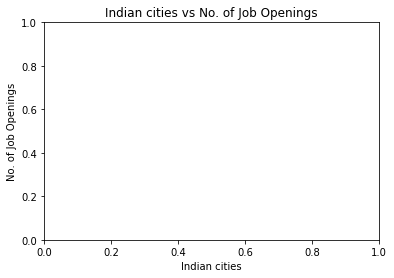

Pune 0.71
Gurgaon 3.55
Chennai 23.40
Hyderabad 25.53
Bangalore 46.81


In [12]:
india=data[data['location'].str.split(',',expand=True)[0]=='IN']
city=india['location'].str.split(',',expand=True)[2]
freq = city.value_counts(ascending = True)
#freq.sort_index(inplace=True)
x = freq.index
y = freq
#y=sorted(y,reverse=True)
plt.pie(y,labels=x,autopct='%.2f%%')
plt.show()
plt.title('Indian cities vs No. of Job Openings')
plt.xlabel('Indian cities')
plt.ylabel('No. of Job Openings')
plt.show()
y1=np.sum(y)
for i in range(len(x)):
    print(x[i].strip(),format((y[i]/y1)*100, '.2f'))

**Year vs No. of jobs opening related to Java**

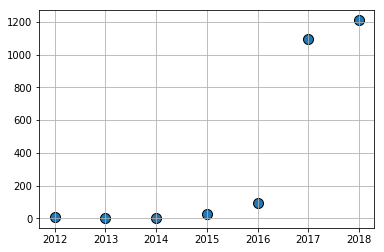

2012 6
2013 2
2014 4
2015 25
2016 95
2017 1093
2018 1210


In [13]:
year = data['Posting_date'].str.split(', ', expand = True)[1]
basic_qualification=data['BASIC QUALIFICATIONS']
array=np.array(list(zip(year,basic_qualification)))
for i in range(len(array)):
    if 'Java' in array[i][1] or 'java' in array[i][1]:
        array[i][1]=1
    else: 
        array[i][1]=0
array=array[array[:,1]=='1']
array=array[:,0]
year=np.unique(array)
job=[] 
for i in year:
    job.append(len(array[array==i]))
plt.scatter(year,job,edgecolors='black',s=100)
plt.grid()
plt.show()
for i in range(len(year)):
    print(year[i],job[i])